# Credit Card Fraud Detection Using AutoEncoder model
1. Goal: Detect fraudulent credit card transactions
2. Dataset: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/download?datasetVersionNumber=3
2. In this notebook:
- EDA of credit card data
- Feature Selection
- Plotting
- Creating AutoEncoder model








In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [62]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Loading The Dataset

In [63]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DS/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0



Here this dataset is made by using PCA (dimensionality reduction technique)


In [64]:
df.shape

(284807, 31)

In [65]:
df.columns.values

array(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
       'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18',
       'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27',
       'V28', 'Amount', 'Class'], dtype=object)

Here the Column Class holds 0 and 1 ( 0 means legitimate transaction and 1 means fraudulant)

In [66]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [67]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


This data is highly imbalanced so our classification task will fail
so we will be using encoder-decoder technique to make a anamoly detector

Do some feature selection using a distribution plot

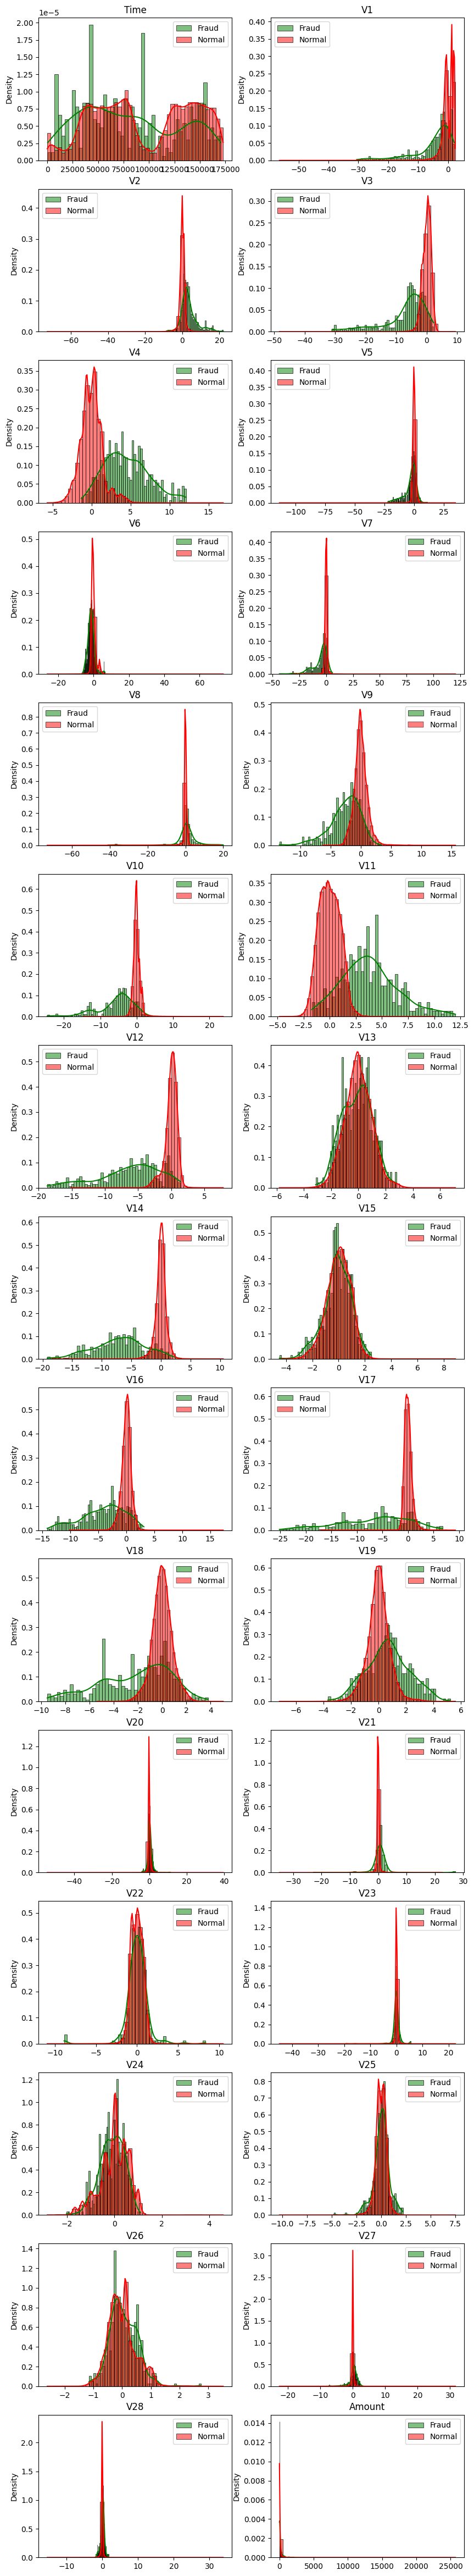

In [70]:
columns = df.iloc[:, df.columns != 'Class'].columns
frauds = df[df['Class'] == 1]
normals = df[df['Class'] == 0]

plt.figure(figsize=(10,15*4))

for n, col in enumerate(columns, 1):
    plt.subplot(15, 2, n)
    sns.histplot(frauds[col], bins=50, color='g', kde=True, stat="density", label='Fraud')
    sns.histplot(normals[col], bins=50, color='r', kde=True, stat="density", label='Normal')
    plt.ylabel('Density')
    plt.title(col)
    plt.xlabel('')
    plt.legend()
plt.show()

In [69]:
from scipy.stats import ttest_ind, mannwhitneyu

for column in df.columns[:-1]:
    t_stat, p_value = ttest_ind(df[df['Class'] == 0][column], df[df['Class'] == 1][column])

    if p_value > 0.05:
        print(f"Column {column} có phân phối giống nhau giữa class 0 và class 1.")


Column V22 có phân phối giống nhau giữa class 0 và class 1.
Column V23 có phân phối giống nhau giữa class 0 và class 1.
Column V25 có phân phối giống nhau giữa class 0 và class 1.



Here the features that follow the same distribution for both legitimate and fraudulent transactions are not important features
Column 'Time' is Number of seconds elapsed between this transaction and the first transaction in the dataset
So we will drop V22, V23, V25,Time

In [71]:
df_selected = df.drop(['V22','V23','V25','Time'], axis = 1)

**Train model auto Encoder**

**AutoEncoder**

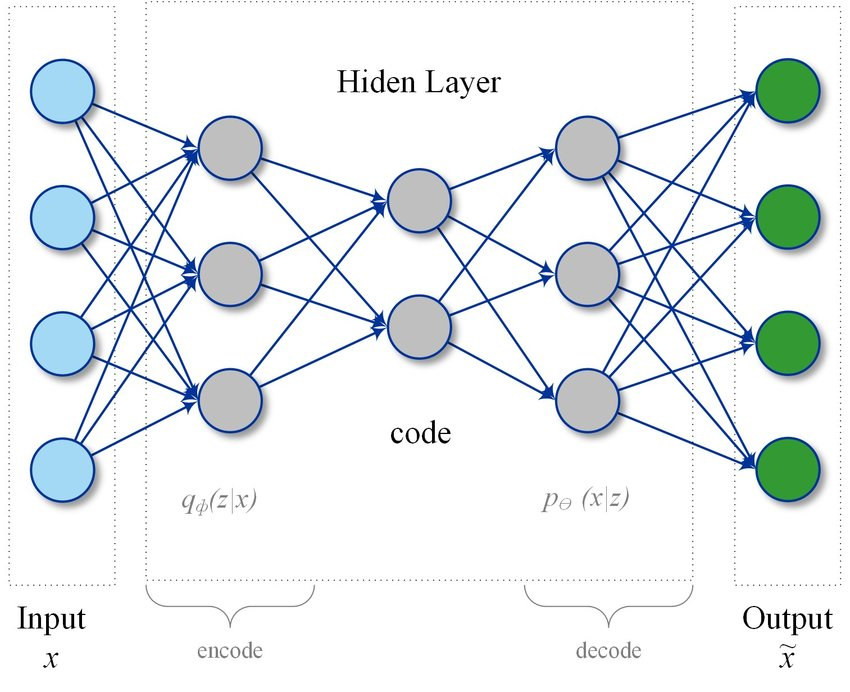

Scale the feature "Amount"

In [72]:
from sklearn.preprocessing import StandardScaler

df_selected['Amount'] = StandardScaler().fit_transform(df_selected['Amount'].values.reshape(-1,1))

In [73]:
df_selected.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V18,V19,V20,V21,V24,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.025791,0.403993,0.251412,-0.018307,0.066928,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.183361,-0.145783,-0.069083,-0.225775,-0.339846,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,-0.121359,-2.261857,0.524980,0.247998,-0.689281,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,1.965775,-1.232622,-0.208038,-0.108300,-1.175575,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.038195,0.803487,0.408542,-0.009431,0.141267,0.502292,0.219422,0.215153,-0.073403,0


Split the data into training and testing

In [74]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(df_selected , test_size = 0.2, random_state=42)

X_train = X_train[X_train['Class']==0]
X_train = X_train.drop(columns=['Class'])

y_test = X_test['Class']
X_test = X_test.drop(columns=['Class'])

X_train = X_train.values
X_test = X_test.values

In [75]:
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)

(227451, 26)
(56962, 26)
(56962,)


Building Auto-Encoder model

In [76]:
from keras.layers import Input, Dense
from keras.models import load_model, Model
from keras.callbacks import ModelCheckpoint

input_dimension = X_train.shape[1]
print(input_dimension)
hidden_size = 256

input_layer = Input(shape=(input_dimension,))
# Encoder
encoder = Dense(hidden_size, activation = "relu") (input_layer)
encoder = Dense(hidden_size //2, activation="relu") (encoder)
encoder = Dense(hidden_size //4, activation="relu") (encoder)

# Decoder
decoder = Dense(hidden_size //4, activation="relu") (encoder)
decoder = Dense(hidden_size //2, activation="relu") (decoder)
decoder = Dense(hidden_size, activation = "relu") (decoder)

# Output
output_layer = Dense(input_dimension, activation="sigmoid") (decoder)

auto_encoder_model= Model(inputs = input_layer, outputs = output_layer)
auto_encoder_model.compile (optimizer ="adam", loss="mse", metrics=['mean_squared_error'])
auto_encoder_model.summary()

26
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 26)]              0         
                                                                 
 dense_7 (Dense)             (None, 256)               6912      
                                                                 
 dense_8 (Dense)             (None, 128)               32896     
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                                 
 dense_11 (Dense)            (None, 128)               8320      
                                                                 
 dense_12 (Dense)            (None, 256)               3

In [77]:
# Train model
n_epochs = 50
n_batch_size = 32

save_best = ModelCheckpoint(filepath = "/content/drive/MyDrive/Colab Notebooks/DS/best.h5",
                            monitor='val_loss', verbose=1, save_best_only=True)

history = auto_encoder_model.fit(X_train, X_train, batch_size=n_batch_size, epochs=n_epochs,verbose=1,
                                 shuffle=True, callbacks=[save_best],
                                 validation_data=(X_test, X_test))



Epoch 1/50
7103/7108 [============================>.] - ETA: 0s - loss: 0.8981 - mean_squared_error: 0.8981
Epoch 1: val_loss improved from inf to 0.90531, saving model to /content/drive/MyDrive/Colab Notebooks/DS/best.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


7108/7108 [==============================] - 39s 5ms/step - loss: 0.8979 - mean_squared_error: 0.8979 - val_loss: 0.9053 - val_mean_squared_error: 0.9053
Epoch 2/50
7104/7108 [============================>.] - ETA: 0s - loss: 0.8293 - mean_squared_error: 0.8293
Epoch 2: val_loss improved from 0.90531 to 0.85202, saving model to /content/drive/MyDrive/Colab Notebooks/DS/best.h5
7108/7108 [==============================] - 34s 5ms/step - loss: 0.8292 - mean_squared_error: 0.8292 - val_loss: 0.8520 - val_mean_squared_error: 0.8520
Epoch 3/50
7103/7108 [============================>.] - ETA: 0s - loss: 0.8171 - mean_squared_error: 0.8171
Epoch 3: val_loss improved from 0.85202 to 0.84750, saving model to /content/drive/MyDrive/Colab Notebooks/DS/best.h5
7108/7108 [==============================] - 36s 5ms/step - loss: 0.8169 - mean_squared_error: 0.8169 - val_loss: 0.8475 - val_mean_squared_error: 0.8475
Epoch 4/50
7097/7108 [============================>.] - ETA: 0s - loss: 0.8001 - mean_

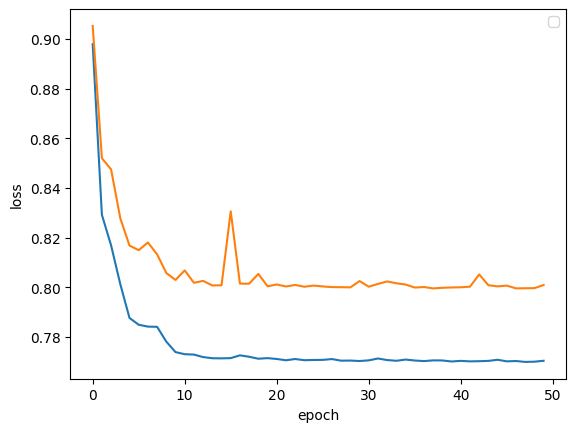

In [78]:
#Plot history
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend()

plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

In [79]:
from keras.models import load_model
auto_encoder_model = load_model('/content/drive/MyDrive/Colab Notebooks/DS/best.h5')

Prediction on test data

In [80]:
predicts = auto_encoder_model.predict(X_test)
mse = np.mean(np.power(X_test - predicts,2), axis=1) #use mse to calculate the error
err_df = pd.DataFrame({'error': mse, 'truth': y_test})

1781/1781 [==============================] - 4s 2ms/step


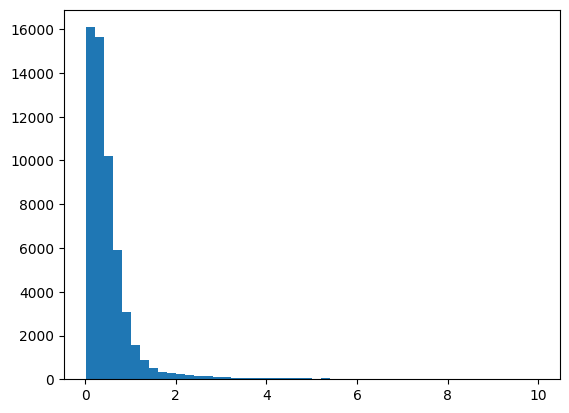

In [81]:
#Plot histogram of error when decoder Normal transactions in the test set
normal_error_df = err_df[(err_df['truth']==0) & (err_df['error'] < 10)]

_ = plt.hist(normal_error_df.error.values, bins= 50)

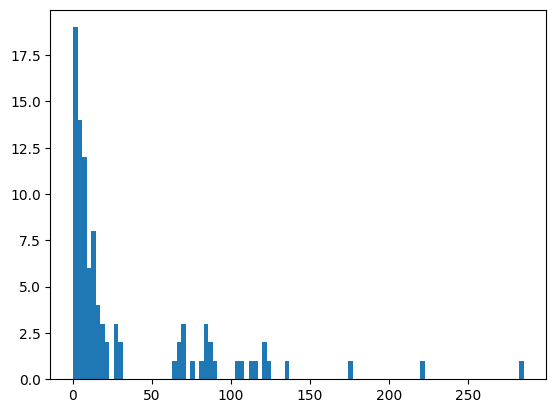

In [82]:
 # Plot histogram of error when decoder Fraud transactions in the test set
fraud_error_df = err_df[(err_df['truth']==1)]
_ = plt.hist(fraud_error_df.error.values, bins= 100)


Here we can see that the error range in fraudulent transactions is much larger than the error in normal transactions.
The error of normal transactions is mostly below 2.3, so we will take 2.3 as the threshold


We will draw the confusion matrix to check

<function matplotlib.pyplot.show(close=None, block=None)>

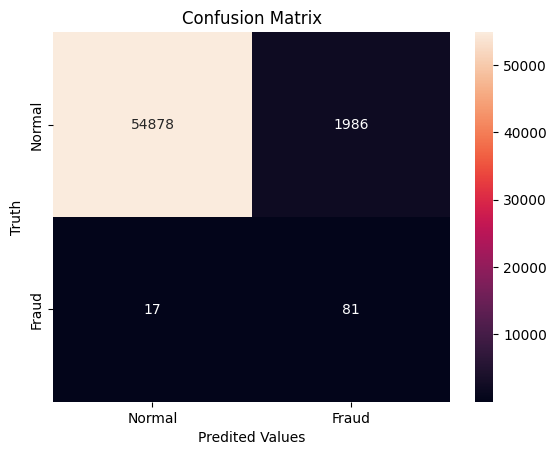

In [83]:
from sklearn.metrics import confusion_matrix

threshold = 2.3

y_pred = [1 if e > threshold else 0 for e in err_df.error.values]
conf_matrix = confusion_matrix(err_df.truth, y_pred)


sns.heatmap(conf_matrix, xticklabels=["Normal", "Fraud"], yticklabels=['Normal','Fraud'], annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predited Values")
plt.ylabel("Truth")
plt.show

From the chart, we see that 54878 were correctly detected as Normal transactions and 1986 were incorrectly detected as Fraudulent transactions, rate below 4%
There were 81 Fraud transactions detected correctly and 17 transactions detected incorrectly, a rate of about 80%.
